In [21]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

# === Synthetic data generator (adapt or replace with your own data) ===
vix_data = pd.read_csv("../data/raw/api_index-vix_20250825-120356.csv")
apple_data = pd.read_csv("../data/raw/api_ticker-AAPL_20250824-162710.csv")
df = pd.DataFrame({
    'VIX.Close': vix_data["Close"],
    'AAPL.Close': apple_data["Close"],
    'AAPL.High': apple_data["High"],
    'AAPL.Low': apple_data["Low"],
    'AAPL.Open': apple_data["Open"],
    'AAPL.Volume': apple_data["Volume"]
})
# # inject a bit of missingness and outliers
# df.loc[np.random.choice(df.index, 5, replace=False), 'income'] = np.nan
# df.loc[np.random.choice(df.index, 3, replace=False), 'spend'] = np.nan
# df.loc[np.random.choice(df.index, 2, replace=False), 'transactions'] = df['transactions'].max()+12
# df.head()

## Implement at least 2 engineered features here

In [22]:
# Added log returns
df['AAPL.Log_Returns'] = np.log(df["AAPL.Close"] / df["AAPL.Close"].shift(1))
# Added 5-d rolling std deviation
df['AAPL.Volatility_5d'] = df['AAPL.Log_Returns'].rolling(window=5).std()

- We can use log returns as a feature because they are more stable for modelling as they are closer to gaussian distribution.
- We can use 5-day Volatility as a column to get an idea about the realized volatility from teh market and that can help predict VIX(implied vol), we use 5-day because we want short term impacts to be captured in our data.

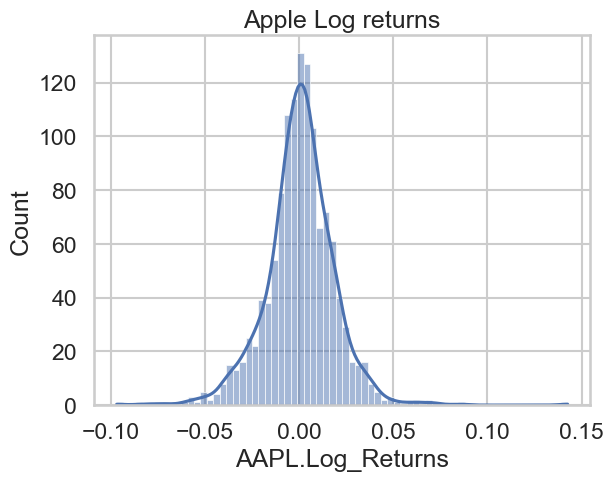

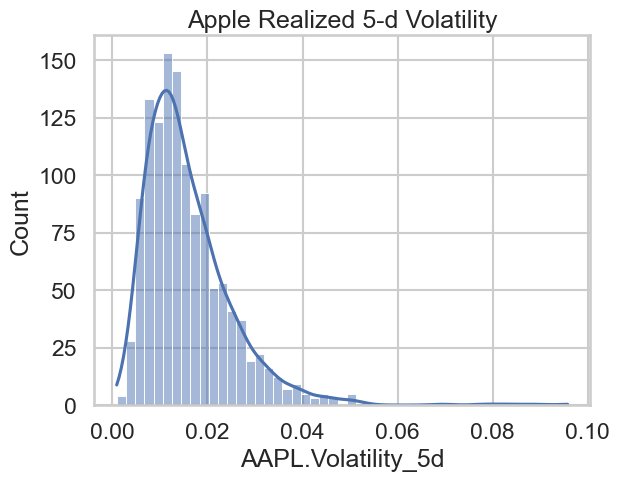

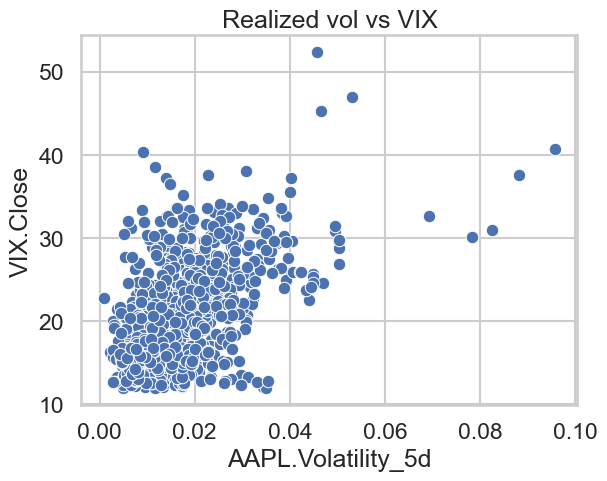

In [25]:
cols = { 'AAPL.Log_Returns':"Apple Log returns",'AAPL.Volatility_5d':"Apple Realized 5-d Volatility"}
for col in cols.keys():
    sns.histplot(df[col], kde=True)
    plt.title(cols[col])
    plt.show()
sns.scatterplot(data=df, x='AAPL.Volatility_5d', y='VIX.Close')
plt.title('Realized vol vs VIX')
plt.show()

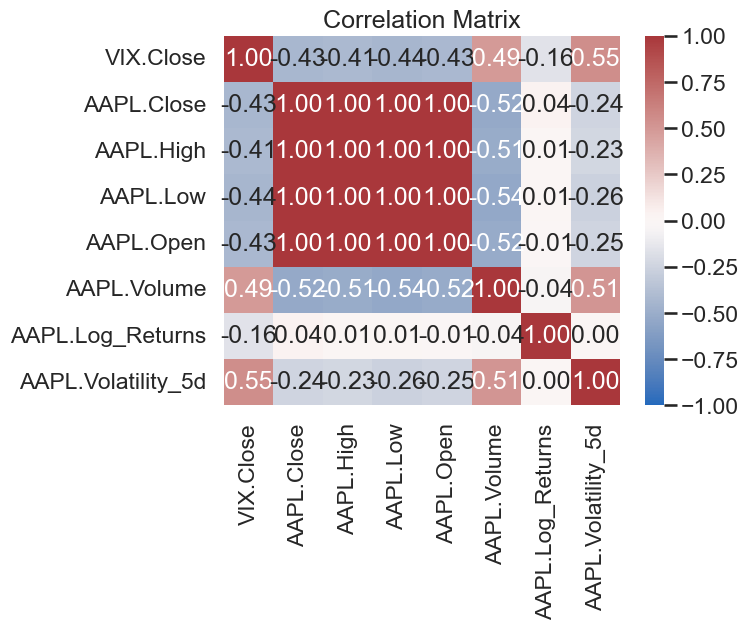

In [24]:
cols = list(df.columns)
corr = df[cols].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

- The new Columns AAPL.Log_Returns and AAPL.Volatility_5d are not correlated with any other independent variables.
- The AAPL.Volatility_5d shows some correlation with the dependent variable which shows it provides useful information for prediction.